# **Tidying**

Part of the data engineering process is data cleaning and tidying. What is done in those two processes, is trying to make the data more readable, and complete. This makes much easier to analyze, visualize, and train the data.


## **Data Tidying**

Making the data more organized, and readable is the result of applying data tidying. 

In this section two main pandas functions are used in data tidying those are `melt` and `pivot_table`.

Let's start by taking a look at the below dataframe, which represents the income ranges based on religion. This is part of the PEW research, which is famous in the US for conducting pollings and surveys on citizens.

When the following are satisfied:


1. Each variable forms a column
2. Each observation forms a row
3. Each type of observational unit forms a table

We can then say that our dataset is *tidy*.

First we need to import pandas to read csv datasets.

In [321]:
# Import libraries
import pandas as pd

In [322]:
# Read CSV file
df_pew_research = pd.read_csv("data/pew-raw.csv")

### **PEW Research Dataset**

1. Start by Importing the dataset into a pandas dataframe.

In [323]:
# Display the DataFrame
print("Display first three rows:")
print(df_pew_research.head(3))

Display first three rows:
   religion   <$10k   $10-20k  $20-30k  $30-40k   $40-50k  $50-75k
0  Agnostic      27        34       60       81        76      137
1   Atheist      12        27       37       52        35       70
2  Buddhist      27        21       30       34        33       58


2. Observe the dataset using the `loc`, `iloc`, `head`, or `tail` approaches

In [324]:
# Using head() to display the DataFrame
print("Using head() to display DataFrame:")
print(df_pew_research.head())
print("\n")

# Using tail() to display the DataFrame
print("Using tail() to display DataFrame:")
print(df_pew_research.tail())
print("\n")

# Using iloc() to display the DataFrame
print("Using iloc() to display DataFrame:")
print("Select rows 2 to 4 (excluding row 5):")
print(df_pew_research.iloc[1:4])
print("Select row 1 and row 3:")
print(df_pew_research.iloc[[0,2]])
print("Select rows 1 to 3, columns 2 to 4:")
print(df_pew_research.iloc[0:3, 1:4])
print("\n")

# Using loc() to display the DataFrame
print("Using loc() to display DataFrame:")
print("Select the 'Agnostic' row:")
print(df_pew_research.loc[df_pew_research['religion'] == 'Agnostic'])
print("Select specific rows and columns:")
print(df_pew_research.loc[0:2, '$20-30k':'$30-40k'])

Using head() to display DataFrame:
            religion   <$10k   $10-20k  $20-30k  $30-40k   $40-50k  $50-75k
0           Agnostic      27        34       60       81        76      137
1            Atheist      12        27       37       52        35       70
2           Buddhist      27        21       30       34        33       58
3           Catholic     418       617      732      670       638     1116
4  Dont know/refused      15        14       15       11        10       35


Using tail() to display DataFrame:
                   religion   <$10k   $10-20k  $20-30k  $30-40k   $40-50k  \
5         Evangelical Prot      575       869     1064      982       881   
6                    Hindu        1         9        7        9        11   
7  Historically Black Prot      228       244      236      238       197   
8         Jehovahs Witness       20        27       24       24        21   
9                   Jewish       19        19       25       25        30   

   $50-75

Summary:
- Use `head` to quickly view the head data
- Use `tail` to quickly view the tail data
- Use `iloc` to select data by position
- Use `loc` to select data by label

***What does not seem right in the above dataframe?***

The pew-raw.csv column names is <$10k, $10-20k, $20-30k, etc. That can impact some problems, like 

(1) The income ranges are "values" rather than "variables".

(2) The data structure is not convenient for data analysis and processing.

3. Try to make the column headers represent a variable not a value. For that, use the `melt` function.

In [325]:
# Use `melt` to organize data
df_tidy = pd.melt(
    df_pew_research,
    id_vars=['religion'],
    var_name='income',
    value_name='count'
)

# Display the tidy DataFrame
print("Tidy DataFrame:")
print(df_tidy)

Tidy DataFrame:
                    religion    income  count
0                   Agnostic     <$10k     27
1                    Atheist     <$10k     12
2                   Buddhist     <$10k     27
3                   Catholic     <$10k    418
4          Dont know/refused     <$10k     15
5          Evangelical Prot      <$10k    575
6                     Hindu      <$10k      1
7   Historically Black Prot      <$10k    228
8          Jehovahs Witness      <$10k     20
9                    Jewish      <$10k     19
10                  Agnostic   $10-20k     34
11                   Atheist   $10-20k     27
12                  Buddhist   $10-20k     21
13                  Catholic   $10-20k    617
14         Dont know/refused   $10-20k     14
15         Evangelical Prot    $10-20k    869
16                    Hindu    $10-20k      9
17  Historically Black Prot    $10-20k    244
18         Jehovahs Witness    $10-20k     27
19                   Jewish    $10-20k     19
20                

In [326]:
# Use `pivot_table` to revert wide format
df_wide = df_tidy.pivot_table(
    index='religion',
    columns='income',
    values='count'
).reset_index()

# Display the tidy and wide DataFrame
print("\nWide DataFrame:")
print(df_wide)


Wide DataFrame:
income                  religion   $10-20k   $40-50k   <$10k  $20-30k  \
0                       Agnostic      34.0      76.0    27.0     60.0   
1                        Atheist      27.0      35.0    12.0     37.0   
2                       Buddhist      21.0      33.0    27.0     30.0   
3                       Catholic     617.0     638.0   418.0    732.0   
4              Dont know/refused      14.0      10.0    15.0     15.0   
5              Evangelical Prot      869.0     881.0   575.0   1064.0   
6                         Hindu        9.0      11.0     1.0      7.0   
7       Historically Black Prot      244.0     197.0   228.0    236.0   
8              Jehovahs Witness       27.0      21.0    20.0     24.0   
9                        Jewish       19.0      30.0    19.0     25.0   

income  $30-40k  $50-75k  
0          81.0    137.0  
1          52.0     70.0  
2          34.0     58.0  
3         670.0   1116.0  
4          11.0     35.0  
5         982.0  

### **Billboard Dataset**

This dataset outlines data about the top hit songs on the Billboard list and the week from entrance that it was in the billboard with the ranking.

1. Read the dataset and store it in a pandas dataframe. Note that the usual utf-8 encoding does not work on this dataset. The reason behind this is that there might be characters that are not supported by `utf-8`.

The suggestion is to use for this dataset `unicode_escape` encoding. (converts all non-ASCII characters into their \uXXXX representations)

In [327]:
# Load the Billboard dataset
df_billboard = pd.read_csv('data/billboard.csv', encoding='unicode_escape')

2. Observe the first few rows of the dataset.

In [328]:
# Display the first few rows Billboard DataFrame
print("\nBillboard DataFrame:")
print(df_billboard.head())


Billboard DataFrame:
   year      artist.inverted                                  track  time  \
0  2000      Destiny's Child               Independent Women Part I  3:38   
1  2000              Santana                           Maria, Maria  4:18   
2  2000        Savage Garden                     I Knew I Loved You  4:07   
3  2000              Madonna                                  Music  3:45   
4  2000  Aguilera, Christina  Come On Over Baby (All I Want Is You)  3:38   

  genre date.entered date.peaked  x1st.week  x2nd.week  x3rd.week  ...  \
0  Rock   2000-09-23  2000-11-18         78       63.0       49.0  ...   
1  Rock   2000-02-12  2000-04-08         15        8.0        6.0  ...   
2  Rock   1999-10-23  2000-01-29         71       48.0       43.0  ...   
3  Rock   2000-08-12  2000-09-16         41       23.0       18.0  ...   
4  Rock   2000-08-05  2000-10-14         57       47.0       45.0  ...   

   x67th.week  x68th.week  x69th.week  x70th.week  x71st.week  x72nd.w

***What is wrong with the above dataset?***

In billboard.csv has some problems:

(1) `wk1`, `wk2`, `wk3`…  are "values" instead of "variables"

(2) not conform each variable should be a field.

(3) This structure is not convenient for analysis and modeling.

3. Let's, again, use the `melt` function to fix the general structure of the dataframe.

In [329]:
# Display the columns of the Billboard DataFrame
print("Tidy Billboard columns:")
print(df_billboard.columns)
print("\n")

# Automatically select all week columns
week_columns = [col for col in df_billboard.columns if '.week' in col]

# Billboard DataFrame to tidy format
df_billboard_tidy = pd.melt(
    df_billboard,
    id_vars=['year', 'artist.inverted', 'track', 'time', 'genre', 'date.entered', 'date.peaked'],
    value_vars=week_columns,
    var_name='week',
    value_name='rank'
)
print("Tidy Billboard tidy columns:")
print(df_billboard_tidy.columns)


Tidy Billboard columns:
Index(['year', 'artist.inverted', 'track', 'time', 'genre', 'date.entered',
       'date.peaked', 'x1st.week', 'x2nd.week', 'x3rd.week', 'x4th.week',
       'x5th.week', 'x6th.week', 'x7th.week', 'x8th.week', 'x9th.week',
       'x10th.week', 'x11th.week', 'x12th.week', 'x13th.week', 'x14th.week',
       'x15th.week', 'x16th.week', 'x17th.week', 'x18th.week', 'x19th.week',
       'x20th.week', 'x21st.week', 'x22nd.week', 'x23rd.week', 'x24th.week',
       'x25th.week', 'x26th.week', 'x27th.week', 'x28th.week', 'x29th.week',
       'x30th.week', 'x31st.week', 'x32nd.week', 'x33rd.week', 'x34th.week',
       'x35th.week', 'x36th.week', 'x37th.week', 'x38th.week', 'x39th.week',
       'x40th.week', 'x41st.week', 'x42nd.week', 'x43rd.week', 'x44th.week',
       'x45th.week', 'x46th.week', 'x47th.week', 'x48th.week', 'x49th.week',
       'x50th.week', 'x51st.week', 'x52nd.week', 'x53rd.week', 'x54th.week',
       'x55th.week', 'x56th.week', 'x57th.week', 'x58th.week'

If we inspect the current dataframe. We find that it is structured in a better way than before. 

However, the ***Week*** column looks a bit ugly!

4. Let's try to place only the week number in that column without the extras surronding it.

In [330]:
# Check the data type of 'week' column
print(f"data type of 'week':", df_billboard_tidy['week'].dtype)

# 'week' changes to numeric
if df_billboard_tidy['week'].dtype != 'int':
    df_billboard_tidy['week'] = df_billboard_tidy['week'].str.extract(r'(\d+)').astype(int)

# Display the tidy Billboard DataFrame
print("\nTidy Billboard DataFrame:")
print(df_billboard_tidy)

data type of 'week': object

Tidy Billboard DataFrame:
       year      artist.inverted                                  track  time  \
0      2000      Destiny's Child               Independent Women Part I  3:38   
1      2000              Santana                           Maria, Maria  4:18   
2      2000        Savage Garden                     I Knew I Loved You  4:07   
3      2000              Madonna                                  Music  3:45   
4      2000  Aguilera, Christina  Come On Over Baby (All I Want Is You)  3:38   
...     ...                  ...                                    ...   ...   
24087  2000     Ghostface Killah                       Cherchez LaGhost  3:04   
24088  2000          Smith, Will                            Freakin' It  3:58   
24089  2000        Zombie Nation                          Kernkraft 400  3:30   
24090  2000       Eastsidaz, The                               Got Beef  3:58   
24091  2000               Fragma                      

5. Now let's inspect the ***Week*** column in the dataframe.

In [331]:
# View the data type of the 'week' column
print(f"data type of 'week': {df_billboard_tidy['week'].dtype}")
print("\n")

# View the first few values ​​of the 'week' column
print("First few values of 'week':")
print(df_billboard_tidy['week'].head())
print("\n")

# View the unique values ​​of the 'week' column (weeks after deduplication)
print("Unique values of 'week':")
print(df_billboard_tidy['week'].unique())
print("\n")

# View the statistical summary of the 'week' column
print("Statistical summary of 'week':")
print(df_billboard_tidy['week'].describe())
print("\n")

data type of 'week': int64


First few values of 'week':
0    1
1    1
2    1
3    1
4    1
Name: week, dtype: int64


Unique values of 'week':
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76]


Statistical summary of 'week':
count    24092.000000
mean        38.500000
std         21.937866
min          1.000000
25%         19.750000
50%         38.500000
75%         57.250000
max         76.000000
Name: week, dtype: float64




Next, let's try to find the date at which the song ranked the number that is shown per row.

6. To do that let's first think of the equation that is going to get us the relevant date at which the song ranked the *rth*.



*Timedeltas are absolute differences in times, expressed in difference units (e.g. days, hours, minutes, seconds). This method converts an argument from a recognized timedelta format / value into a Timedelta type.*


In [332]:
# Convert 'date.entered' to datetime format
df_billboard_tidy['date.entered'] = pd.to_datetime(df_billboard_tidy['date.entered'])

# Convert week numbers to days
df_billboard_tidy['date'] = df_billboard_tidy['date.entered'] + pd.to_timedelta(df_billboard_tidy['week'] - 1, unit='W')

# Display the first few rows of the final tidy Billboard DataFrame
print("Final Tidy Billboard DataFrame:")
print(df_billboard_tidy.head())

Final Tidy Billboard DataFrame:
   year      artist.inverted                                  track  time  \
0  2000      Destiny's Child               Independent Women Part I  3:38   
1  2000              Santana                           Maria, Maria  4:18   
2  2000        Savage Garden                     I Knew I Loved You  4:07   
3  2000              Madonna                                  Music  3:45   
4  2000  Aguilera, Christina  Come On Over Baby (All I Want Is You)  3:38   

  genre date.entered date.peaked  week  rank       date  
0  Rock   2000-09-23  2000-11-18     1  78.0 2000-09-23  
1  Rock   2000-02-12  2000-04-08     1  15.0 2000-02-12  
2  Rock   1999-10-23  2000-01-29     1  71.0 1999-10-23  
3  Rock   2000-08-12  2000-09-16     1  41.0 2000-08-12  
4  Rock   2000-08-05  2000-10-14     1  57.0 2000-08-05  


***What is the problem with the calculation above?***

Here are some problems:

(1) The dataset has missing values and abnormal weeks that can impact calculation results.

(2) If the `date.entered` of the original data is not the starting day of the chart week for each song. These results will differ from the actual Billboard chart week date

7. Let's only keep necessary columns

In [333]:
# Keep necessary columns
df_billboard_final = df_billboard_tidy[['artist.inverted', 'track', 'week', 'date', 'rank']]

8. How to rename your columns?

In [334]:
# Rename columns for clarity
df_billboard_final = df_billboard_final.copy()
df_billboard_final.rename(
    columns={
        'artist.inverted': 'artist',
        'track': 'title',
        'week': 'week_number',
        'date': 'rank_date'
    },
    inplace=True
)

Display the dataframe

In [336]:
# Display the Billboard DataFrame
print(df_billboard_final.head())

                artist                                  title  week_number  \
0      Destiny's Child               Independent Women Part I            1   
1              Santana                           Maria, Maria            1   
2        Savage Garden                     I Knew I Loved You            1   
3              Madonna                                  Music            1   
4  Aguilera, Christina  Come On Over Baby (All I Want Is You)            1   

   rank_date  rank  
0 2000-09-23  78.0  
1 2000-02-12  15.0  
2 1999-10-23  71.0  
3 2000-08-12  41.0  
4 2000-08-05  57.0  


In the above dataframe, there are some *NaN* values. What are we going to do? <br/>
9. Apply quick data cleaning and then observe the dataset

In [339]:
# Check for NaN values in the Billboard final DataFrame
nan_summary = df_billboard_final.isna().sum()
print("NaN summary:\n", nan_summary)
print("\n")

# Drop rows with NaN values in specific columns
df_billboard_final_cleaned = df_billboard_final.dropna(subset=['rank'])

# Display the cleaned Billboard DataFrame
print("Cleaned Billboard DataFrame:")
print(df_billboard_final_cleaned.head())
print("\n")
print("NaN after cleaning:\n", df_billboard_final_cleaned.isna().sum())

NaN summary:
 artist             0
title              0
week_number        0
rank_date          0
rank           18785
dtype: int64


Cleaned Billboard DataFrame:
                artist                                  title  week_number  \
0      Destiny's Child               Independent Women Part I            1   
1              Santana                           Maria, Maria            1   
2        Savage Garden                     I Knew I Loved You            1   
3              Madonna                                  Music            1   
4  Aguilera, Christina  Come On Over Baby (All I Want Is You)            1   

   rank_date  rank  
0 2000-09-23  78.0  
1 2000-02-12  15.0  
2 1999-10-23  71.0  
3 2000-08-12  41.0  
4 2000-08-05  57.0  


NaN after cleaning:
 artist         0
title          0
week_number    0
rank_date      0
rank           0
dtype: int64


## **Data Cleaning**

Data cleaning involves removing unwanted characters, imputing, or dropping missing values.

The decision is based on the dataset you have, and the information you can extract from the other columns.


Examples of data cleaning include cleaning:

1.   **Missing Data**
- Identify missing values: if the value is NaN or blanks, represent missing values.
- Can use the statistical methods (mean, median, mode) to fill in missing values or drop rows/columns with excessive missingness.
2.   **Irregular Data** (Outliers)
- Detect values that are normal or outliers.
- Assess outliers whether errors or valid extreme values, then decide to correct, cap, or remove outliers.
3.   **Unnecessary Data** — Repetitive Data, Duplicates and more
- Delete rows of duplicate, repetitive, or redundant.
- Drop columns of useless data analysis or irrelevant identifiers.
4.   **Inconsistent Data** — Capitalization, Addresses and more
- Standardize text, such as capitalization, spelling.
- Normalize formats for dates, categorical values, or addresses.








### **Cars Data Set**

Start by reading the dataset related to car models: ./CSVs/cars.csv

In [340]:
# Import library
import numpy as np
import matplotlib.pyplot as plt

In [341]:
# Load the cars dataset
df_cars = pd.read_csv('data/cars.csv', delimiter=';')

# Display the first few rows of the cars DataFrame
print("\nCars DataFrame:")
print(df_cars.head())


Cars DataFrame:
                         Car     MPG Cylinders Displacement Horsepower  \
0                     STRING  DOUBLE       INT       DOUBLE     DOUBLE   
1  Chevrolet Chevelle Malibu     NaN         8        307.0      130.0   
2          Buick Skylark 320    15.0         8        350.0        NaN   
3         Plymouth Satellite     NaN         8        318.0      150.0   
4              AMC Rebel SST    16.0         8          NaN      150.0   

   Weight Acceleration Model Origin  
0  DOUBLE       DOUBLE   INT    CAT  
1   3504.         12.0    70     US  
2   3693.         11.5    70     US  
3   3436.         11.0    70     US  
4     NaN         12.0    70     US  


First Row seems to be the datatype, we need to remove it

In [342]:
# Remove the data type description
df_cars = df_cars.iloc[1:].reset_index(drop=True)

# Display the cleaned cars DataFrame
print("\nCleaned Cars DataFrame:")
print(df_cars.head())


Cleaned Cars DataFrame:
                         Car   MPG Cylinders Displacement Horsepower Weight  \
0  Chevrolet Chevelle Malibu   NaN         8        307.0      130.0  3504.   
1          Buick Skylark 320  15.0         8        350.0        NaN  3693.   
2         Plymouth Satellite   NaN         8        318.0      150.0  3436.   
3              AMC Rebel SST  16.0         8          NaN      150.0    NaN   
4                Ford Torino  17.0         8        302.0      140.0  3449.   

  Acceleration Model Origin  
0         12.0    70     US  
1         11.5    70     US  
2         11.0    70     US  
3         12.0    70     US  
4         10.5    70     US  


Let's observe the columns with null values.  Either by using the `isnull().sum()` function 

In [343]:
# Check for NaN values in the cars DataFrame
cars_nan_summary = df_cars.isnull().sum()
print("NaN summary:\n", cars_nan_summary)

NaN summary:
 Car             0
MPG             3
Cylinders       0
Displacement    1
Horsepower      2
Weight          1
Acceleration    0
Model           0
Origin          0
dtype: int64


There aren't many missing values. Let's take a glimpse at the percentage of the missing values:

**HINT:** We'll need `Numpy` for the below task.

In [344]:
# Calculate the percentage of missing values ​​for each column
missing_percentage = (df_cars.isnull().sum() / len(df_cars)) * 100
print("Missing values ​​percentage:\n", np.round(missing_percentage, 2))
print("\n")

# Calculate the total missing value ratio for all fields and columns
total_cells = np.product(df_cars.shape)
total_missing = df_cars.isnull().sum().sum()
missing_percentage_total = (total_missing / total_cells) * 100
print("Total missing values ​​percentage: {:.2f}%".format(missing_percentage_total))

Missing values ​​percentage:
 Car             0.00
MPG             0.74
Cylinders       0.00
Displacement    0.25
Horsepower      0.49
Weight          0.25
Acceleration    0.00
Model           0.00
Origin          0.00
dtype: float64


Total missing values ​​percentage: 0.19%


Around *0.19%* of the values are missing, which isn't a lot. Therefore, we might go with the option of dropping all the rows with null values.

In [345]:
# Drop rows containing NaN
df_cars_drop_rows = df_cars.dropna().reset_index(drop=True)

# Check for NaN values in the cars drop rows DataFrame
print("NaN summary after dropna:\n", df_cars_drop_rows.isnull().sum())

NaN summary after dropna:
 Car             0
MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model           0
Origin          0
dtype: int64


Lets also check dropping the columns

In [346]:
# Drop columns containing NaN
df_cars_drop_cols = df_cars.dropna(axis=1).reset_index(drop=True)

# Check for NaN values in the cars drop columns DataFrame
print("NaN summary after dropping columns:\n", df_cars_drop_cols.isnull().sum())

# Display the processed DataFrame
print("\nDataFrame after dropping columns with NaN:")
print(df_cars_drop_cols.head())

NaN summary after dropping columns:
 Car             0
Cylinders       0
Acceleration    0
Model           0
Origin          0
dtype: int64

DataFrame after dropping columns with NaN:
                         Car Cylinders Acceleration Model Origin
0  Chevrolet Chevelle Malibu         8         12.0    70     US
1          Buick Skylark 320         8         11.5    70     US
2         Plymouth Satellite         8         11.0    70     US
3              AMC Rebel SST         8         12.0    70     US
4                Ford Torino         8         10.5    70     US


Let's observe how many columns we lost

In [347]:
# Compare the number of columns before and after deletion
original_cols = df_cars.shape[1]
after_drop_cols = df_cars_drop_cols.shape[1]
lost_cols = original_cols - after_drop_cols

print(f"Original number of columns: {original_cols}")
print(f"Number of columns remaining after deleting columns containing NaN: {after_drop_cols}")
print(f"Number of lost columns: {lost_cols}")

Original number of columns: 9
Number of columns remaining after deleting columns containing NaN: 5
Number of lost columns: 4


### **Cars Dataset - Filling in missing values automatically**

Another option is to try and fill in the missing values through imputations.

Let's take the `MPG` column for example. We can fill in the missing values with 0s through the following line of code:

`df_cars.fillna(0) `. 

In [348]:
# Fill NaN values in the 'MPG' column with 0
df_cars_filled = df_cars.copy()
df_cars_filled['MPG_filled'] = df_cars_filled['MPG'].fillna(0)

However, this does not make much sense as there isn't MPG equal to 0. How about we plot the MPG column and if it follows a random distribution we can use the mean of the column to compute the missing values. Otherwise, we can use the median (if there is a skewed normal distribution). However, there might be a better way of imputation which is getting the median or the mean of the MPG of the cars with similar attributes.

data type of MPG: object


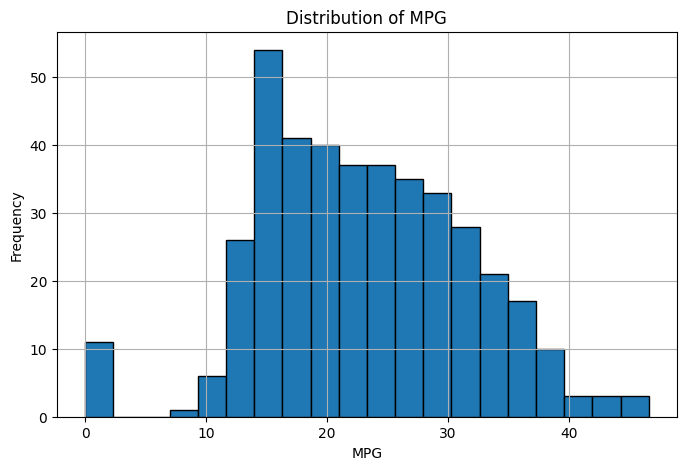

In [349]:
# Check the data type of the 'MPG'
print("data type of MPG:", df_cars_filled['MPG_filled'].dtype)

# Convert 'MPG' to numeric, coercing errors to NaN
df_cars_filled['MPG_filled'] = pd.to_numeric(df_cars_filled['MPG_filled'], errors='coerce')

# Display a histogram of the 'MPG'
plt.figure(figsize=(8, 5))
df_cars_filled['MPG_filled'].hist(bins=20, edgecolor='black')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.title('Distribution of MPG')
plt.show()

From the histogram of MPG, we can see that most values ​​are concentrated between 10 and 30, indicating a skewed distribution to the right. We can use the median to fill MPG missing values, or use the median of the group (Cylinders and Origin) to fill MPG missing values.

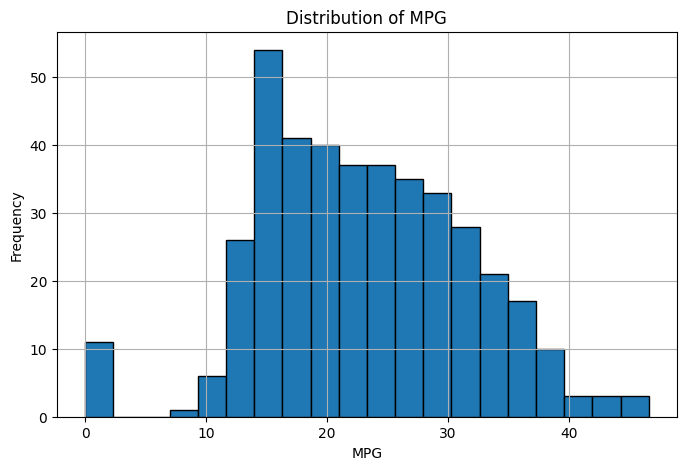

In [350]:
# Using the median to fill missing values in 'MPG'
df_cars_filled['MPG_imputed_median'] = df_cars_filled['MPG_filled'].fillna(df_cars_filled['MPG_filled'].median())

# Display a histogram of the 'MPG'
plt.figure(figsize=(8, 5))
df_cars_filled['MPG_imputed_median'].hist(bins=20, edgecolor='black')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.title('Distribution of MPG')
plt.show()

Because the missing values < 1%, the distribution of MPG didn't change.

If we observe the graph above, we can consider it in a way or another normally distributed. Therefore, we can impute the missing values using the mean.

To compute the mean we need numeric values. However the values in the dataframe are objects. Therefore, we need to change them to numerics so that we can compute them.

In [351]:
# Convert 'MPG' to numeric, coercing errors to NaN
df_cars_filled['MPG_filled'] = pd.to_numeric(df_cars_filled['MPG_filled'], errors='coerce')

Now let's see what is the mean of the MPG column

In [352]:
# Calculate the mean of the 'MPG'
mpg_mean = df_cars_filled['MPG_filled'].mean()
print("The average value of the MPG column is:", mpg_mean)
print("\n")

print("describe of MPG: \n", df_cars_filled['MPG_filled'].describe())

The average value of the MPG column is: 22.925615763546798


describe of MPG: 
 count    406.000000
mean      22.925616
std        8.615334
min        0.000000
25%       16.925000
50%       22.350000
75%       29.000000
max       46.600000
Name: MPG_filled, dtype: float64


We can use this mean to compute the missing values since the graph demonstarted a normal distribution

In [353]:
# Using the mean to fill missing values in 'MPG'
df_cars_filled['MPG_imputed_mean'] = df_cars_filled['MPG_filled'].fillna(mpg_mean)

### **Car Dataset - Simple Imputer**

*SimpleImputer* is a `scikit-learn` class which is helpful in handling the missing data in the predictive model dataset. It replaces the `NaN` values with a specified placeholder.
It is implemented by the use of the `SimpleImputer()` method which takes the following arguments :

`missing_values` : The missing_values placeholder which has to be imputed. By default is NaN

`strategy` : The data which will replace the NaN values from the dataset. The strategy argument can take the values – ‘mean'(default), ‘median’, ‘most_frequent’ and ‘constant’.


Let's start by importing the `SimpleImputer` into our notebook

In [354]:
# Import SimpleImputer from sklearn
from sklearn.impute import SimpleImputer

What we need to do are two essential steps:

1. fit the data (compute the mean / median / most freq)
2. transform the data (place the computed values in the NaN cells)

In [356]:
# Create a copy of the DataFrame for SimpleImputer
df_cars_SimpleImputer = df_cars.copy()

# Create a SimpleImputer object with the strategy set to 'mean'
imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer_median = SimpleImputer(missing_values=np.nan, strategy='median')
imputer_most_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Only for the 'MPG' column
# Must be a 2D array
mpg_array = df_cars_SimpleImputer[['MPG']].values 
# Step 1: Fit the data
imputer_mean.fit(mpg_array)
imputer_median.fit(mpg_array)
imputer_most_frequent.fit(mpg_array)
# Step 2: Fill in missing values
mpg_filled_mean = imputer_mean.transform(mpg_array)
mpg_filled_median = imputer_median.transform(mpg_array)
mpg_filled_most_frequent = imputer_most_frequent.transform(mpg_array)

# Store the results back to the DataFrame
df_cars['MPG_imputed_mean'] = mpg_filled_mean.ravel()
df_cars['MPG_imputed_median'] = mpg_filled_median.ravel()
df_cars['MPG_imputed_most_frequent'] = mpg_filled_most_frequent.ravel()

# Display the first few rows of the SimpleImputer DataFrame
print("SimpleImputer DataFrame:")
print(df_cars_SimpleImputer.head())

SimpleImputer DataFrame:
                         Car   MPG Cylinders Displacement Horsepower Weight  \
0  Chevrolet Chevelle Malibu   NaN         8        307.0      130.0  3504.   
1          Buick Skylark 320  15.0         8        350.0        NaN  3693.   
2         Plymouth Satellite   NaN         8        318.0      150.0  3436.   
3              AMC Rebel SST  16.0         8          NaN      150.0    NaN   
4                Ford Torino  17.0         8        302.0      140.0  3449.   

  Acceleration Model Origin  MPG_imputed_mean  MPG_imputed_median  \
0         12.0    70     US         23.096278                22.5   
1         11.5    70     US         15.000000                15.0   
2         11.0    70     US         23.096278                22.5   
3         12.0    70     US         16.000000                16.0   
4         10.5    70     US         17.000000                17.0   

  MPG_imputed_most_frequent  
0                      13.0  
1                      15

## **Outlier Detection** 


An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects. They can be caused by measurement or execution errors. The analysis for outlier detection is referred to as outlier mining. There are many ways to detect the outliers, and the removal process is the data frame same as removing a data item from the panda’s data frame.



https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/





In [357]:
# Import libraries and modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
import sklearn
from sklearn.datasets import load_diabetes
from scipy import stats

In [358]:
# Load the dataset
diabetics = load_diabetes()

# Create the dataframe
column_name = diabetics.feature_names
df_diabetics = pd.DataFrame(diabetics.data)
df_diabetics.columns = column_name

# Display the first few rows of the diabetes DataFrame
print("Diabetes DataFrame:")
print(df_diabetics.head())

Diabetes DataFrame:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


### Outliers Visualization

#### Visualizing Outliers Using Box Plot
It captures the summary of the data effectively and efficiently with only a simple box and whiskers. Boxplot summarizes sample data using 25th, 50th, and 75th percentiles. One can just get insights(quartiles, median, and outliers) into the dataset by just looking at its boxplot.

Text(0.5, 1.0, 'Original Box Plot of bmi')

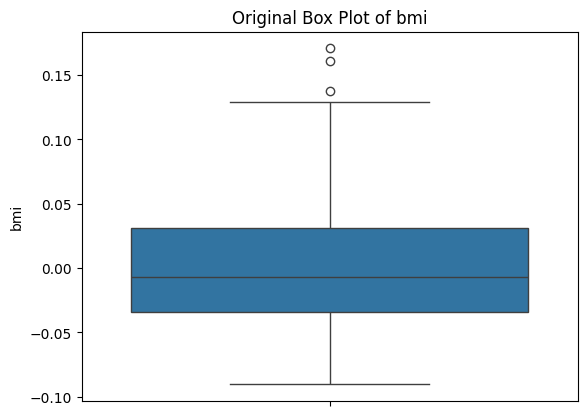

In [359]:
# Box Plot
sns.boxplot(df_diabetics['bmi'])
plt.title(f'Original Box Plot of bmi')

We can see that the circle points (values above 10) are outliers. Next step, remove these outliers.

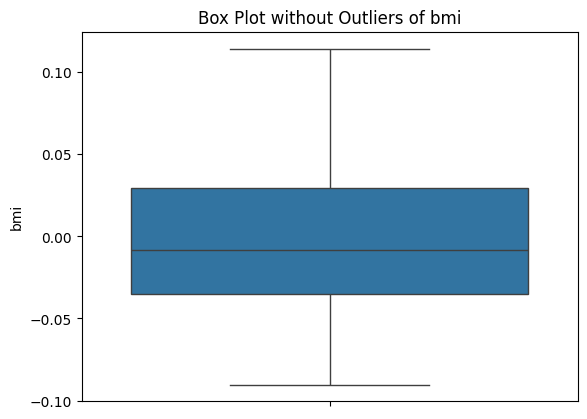

In [360]:
# Define remove outliers function
def removal_box_plot(df, column, threshold):
    removed_outliers = df[df[column] <= threshold]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers

threshold_value = 0.12

no_outliers = removal_box_plot(df_diabetics, 'bmi', threshold_value)

These outliers of greater than or equal to 0.12 have already been removed from this graph.

#### Visualizing Outliers Using ScatterPlot.

It is used when you have paired numerical data and when your dependent variable has multiple values for each reading independent variable, or when trying to determine the relationship between the two variables. In the process of utilizing the scatter plot, one can also use it for outlier detection.

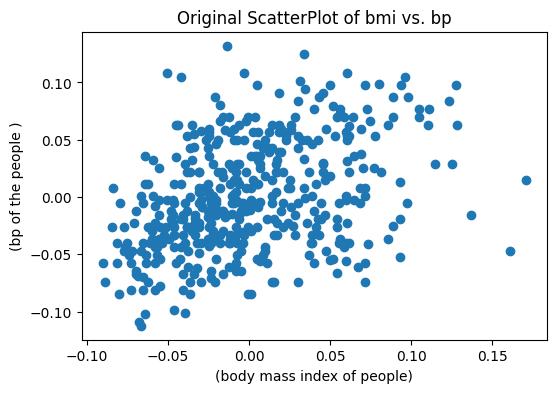

In [361]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(df_diabetics['bmi'], df_diabetics['bp'])
ax.set_xlabel('(body mass index of people)')
ax.set_ylabel('(bp of the people )')
plt.title(f'Original ScatterPlot of bmi vs. bp')
plt.show()

From the graph, most of the data points are in the bottom left corner. Only a few data points are in the top right corner, which represent outliers.

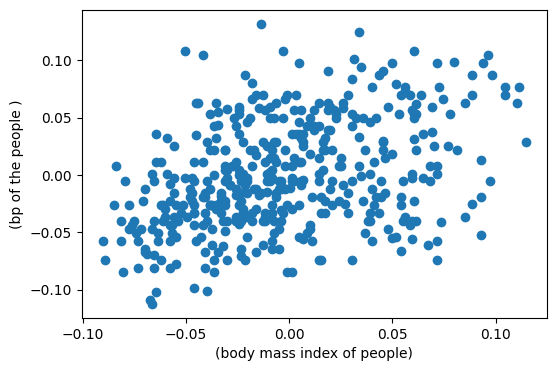

In [362]:
# Remove outliers
outlier_indices = np.where((df_diabetics['bmi'] > 0.12) & (df_diabetics['bp'] < 0.8))
no_outliers = df_diabetics.drop(outlier_indices[0])

# Scatter plot without outliers
fig, ax_no_outliers = plt.subplots(figsize=(6, 4))
ax_no_outliers.scatter(no_outliers['bmi'], no_outliers['bp'])
ax_no_outliers.set_xlabel('(body mass index of people)')
ax_no_outliers.set_ylabel('(bp of the people )')
plt.show()

Using NumPy's np.where() function to find the bmi > 0.12 and bp < 0.8 outliers. When these outliers are removed, the data points are relatively concentrated.

#### Z-Score:
Z- Score is also called a standard score. This value/score helps to understand that how far is the data point from the mean. And after setting up a threshold value one can utilize z score values of data points to define the outliers.
<br>
Zscore = (data_point -mean) / std. deviation



In [363]:
# Use SciPy stats module to calculate z-scores
z = np.abs(stats.zscore(df_diabetics['age']))
print("Z-scores of 'age':\n ", z)

Z-scores of 'age':
  0      0.800500
1      0.039567
2      1.793307
3      1.872441
4      0.113172
         ...   
437    0.876870
438    0.115937
439    0.876870
440    0.956004
441    0.956004
Name: age, Length: 442, dtype: float64


Now to define an outlier threshold value is chosen which is generally 3.0. As 99.7% of the data points lie between +/- 3 standard deviation (using Gaussian Distribution approach).

Rows where Z value is greater than 2

In [364]:
# Set a threshold for z-scores
threshold_z = 2

# Identify outliers based on z-scores
outlier_indices = np.where(z > threshold_z)[0]
no_outliers = df_diabetics.drop(outlier_indices)
print("Original DataFrame Shape:", df_diabetics.shape)
print("DataFrame Shape after Removing Outliers:", no_outliers.shape)

Original DataFrame Shape: (442, 10)
DataFrame Shape after Removing Outliers: (426, 10)


Set a threshold value of 2 and NumPy's np.where() to identify the positions. If age > 2, represent outliers. Then removed these outliers in the Z-score array.

#### IQR (Inter-Quartile Range)
Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field. <Br>
IQR = Quartile3 - Quartile1

In [365]:
# Set Q1 and Q3 for IQR calculation
Q1 = np.percentile(df_diabetics['bmi'], 25, method='midpoint')
Q3 = np.percentile(df_diabetics['bmi'], 75, method='midpoint')

# Calculate IQR
IQR = Q3 - Q1
print("IRQ:",IQR)

IRQ: 0.06520763046978838


To define the outlier base value is defined above and below dataset’s normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :<br>
upper = Q3 + 1.5 * IQR <br>
lower = Q1 - 1.5 * IQR <br> 

In [366]:
# Above Upper bound
upper = Q3+1.5*IQR
upper_array = np.array(df_diabetics['bmi'] >= upper)
print("Upper Bound:", upper)
print("Sum of Upper Bound: ", upper_array.sum())
print("\n")

# Below Lower bound
lower = Q1-1.5*IQR
lower_array = np.array(df_diabetics['bmi'] <= lower)
print("Lower Bound:", lower)
print("Sum of Lower Bound: ", lower_array.sum())

Upper Bound: 0.12879000811776306
Sum of Upper Bound:  3


Lower Bound: -0.13204051376139045
Sum of Lower Bound:  0


- Removing the outliers:
For removing the outlier, one must follow the same process of removing an entry from the dataset using its exact position in the dataset because in all the above methods of detecting the outliers end result is the list of all those data items that satisfy the outlier definition according to the method used.

In [367]:
# Load the dataset
diabetes = load_diabetes()

# Create the dataframe
column_name = diabetes.feature_names
df_diabetes = pd.DataFrame(diabetes.data)
df_diabetes .columns = column_name
df_diabetes .head()
print("Old Shape: ", df_diabetes.shape)

''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = df_diabetes['bmi'].quantile(0.25)
Q3 = df_diabetes['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df_diabetes['bmi'] >= upper)[0]
lower_array = np.where(df_diabetes['bmi'] <= lower)[0]

# Removing the outliers
df_diabetes.drop(index=upper_array, inplace=True)
df_diabetes.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", df_diabetes.shape)

Old Shape:  (442, 10)
New Shape:  (439, 10)


### Conclusion
- Box plots and scatter plots can be used to visualize outliers.
- Z-scores and Inter Quartile Range (IQR) using math approaches to identify outliers.